<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/Aged_pet_weight_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("/content/AGED PET MP.csv")

In [3]:
df.columns

Index(['time', 'tem', 'heating rate', 'weight loss', 'DTG', 'Unnamed: 5'], dtype='object')

In [4]:
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)

In [5]:
df_res =  df[['time', 'tem', 'heating rate', 'weight loss']]

In [6]:
label = df['label']

In [7]:
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [8]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df

,0,1,2,3
0,0.000000e+00,0.951972,0.000000,0.306185
1,8.906623e-07,0.016664,0.999847,0.005360
2,3.561241e-06,0.033313,0.999388,0.010710
3,8.006925e-06,0.049931,0.998624,0.016054
4,1.421887e-05,0.066504,0.997557,0.021381
...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338
4050,6.897649e-02,0.995683,0.014751,0.060328
4051,6.898151e-02,0.995684,0.014747,0.060318
4052,6.898723e-02,0.995684,0.014744,0.060308


In [9]:
transform_df = pd.concat([transform_df,root_series(df_res)],axis=1)
transform_df.columns = ['time', 'tem', 'heating rate', 'weight loss','Root']
transform_df

,time,tem,heating rate,weight loss,Root
0,0.000000e+00,0.951972,0.000000,0.306185,327.572675
1,8.906623e-07,0.016664,0.999847,0.005360,18712.667198
2,3.561241e-06,0.033313,0.999388,0.010710,9360.032248
3,8.006925e-06,0.049931,0.998624,0.016054,6244.594859
4,1.421887e-05,0.066504,0.997557,0.021381,4688.603984
...,...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338,978.433885
4050,6.897649e-02,0.995683,0.014751,0.060328,978.594327
4051,6.898151e-02,0.995684,0.014747,0.060318,978.764727
4052,6.898723e-02,0.995684,0.014744,0.060308,978.925169


In [10]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,weight loss,Root,label
0,0.000000e+00,0.951972,0.000000,0.306185,327.572675,Training
1,8.906623e-07,0.016664,0.999847,0.005360,18712.667198,Training
2,3.561241e-06,0.033313,0.999388,0.010710,9360.032248,Training
3,8.006925e-06,0.049931,0.998624,0.016054,6244.594859,Training
4,1.421887e-05,0.066504,0.997557,0.021381,4688.603984,Training
...,...,...,...,...,...,...
4049,6.897076e-02,0.995683,0.014755,0.060338,978.433885,Training
4050,6.897649e-02,0.995683,0.014751,0.060328,978.594327,Training
4051,6.898151e-02,0.995684,0.014747,0.060318,978.764727,Training
4052,6.898723e-02,0.995684,0.014744,0.060308,978.925169,Training


In [11]:
df_training = dataframe.loc[dataframe['label'] == "Training"]

In [12]:
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']

In [14]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="sigmoid"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)     

Epoch 1/50
195/195 [==============================] - 2s 5ms/step - loss: 0.2844 - root_mean_squared_error: 0.5333 - val_loss: 1.9713e-04 - val_root_mean_squared_error: 0.0140
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0049 - root_mean_squared_error: 0.0698 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1140
Epoch 3/50
195/195 [==============================] - 1s 4ms/step - loss: 0.0024 - root_mean_squared_error: 0.0485 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1141
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0485 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1133
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.0023 - root_mean_squared_error: 0.0484 - val_loss: 0.0136 - 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 8)                 32        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [16]:
met_df  = pd.DataFrame(model.history.history)

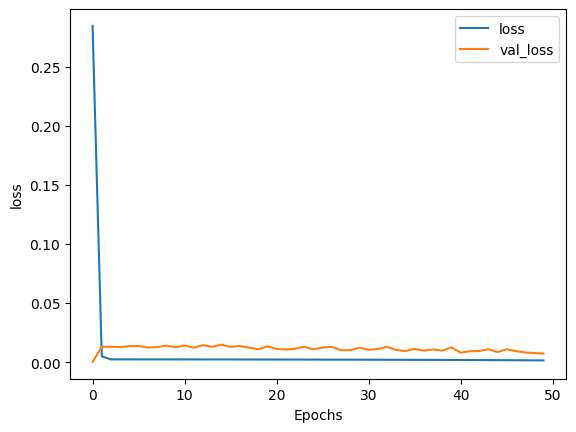

In [19]:
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

In [20]:
mse  = met_df[['root_mean_squared_error','val_root_mean_squared_error']]

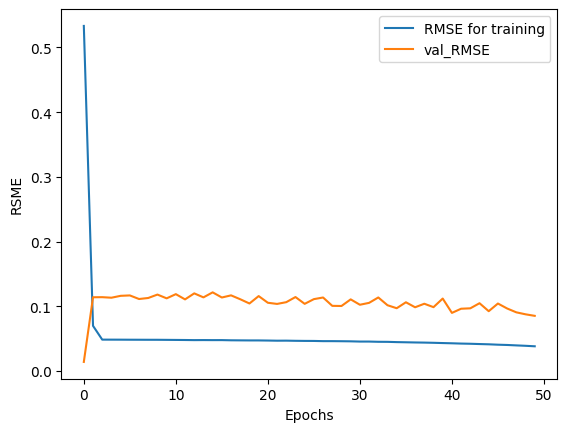

In [21]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [24]:
predictions = model.predict(X_val)     

13/13 [==============================] - 0s 2ms/step


In [27]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 0.0037247554545156887
RMSE 0.061030774651119155
MAE 0.05154751561248705
R2_Score 0.2036780094039452


In [28]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df

,time,tem,heating rate
0,0.000088,0.164170,0.985023
1,0.000304,0.300491,0.948919
2,0.000624,0.419084,0.898037
3,0.001017,0.517728,0.839559
4,0.001207,0.555353,0.812712
...,...,...,...
400,0.068728,0.995672,0.014909
401,0.068810,0.995676,0.014857
402,0.068883,0.995677,0.014817
403,0.068936,0.995681,0.014780


In [30]:
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.230671,0.052711
1,0.000304,0.300491,0.948919,0.237336,0.096213
2,0.000624,0.419084,0.898037,0.242159,0.133786


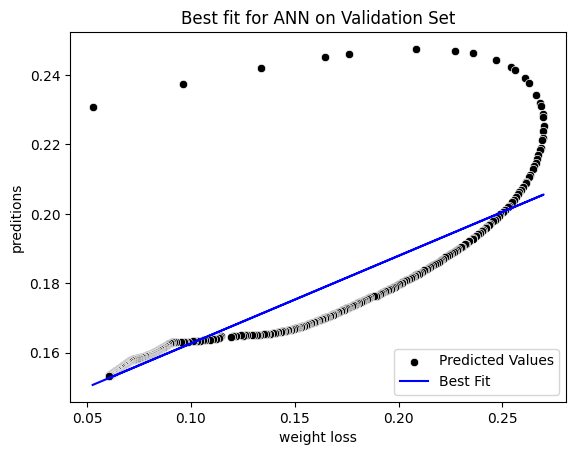

In [38]:
x = final_df['weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='weight loss', y='preditions', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='blue', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [40]:
predictions = model.predict(X_test)  

13/13 [==============================] - 0s 2ms/step


In [43]:
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

MSE 0.003732462892362488
RMSE 0.06109388588363395
MAE 0.051499759570073154
R2_Score 0.2034939690955062


In [44]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.226213,0.026688
1,0.000335,0.314620,0.943859,0.237963,0.100723
2,0.000546,0.394437,0.910238,0.241243,0.126040
3,0.000970,0.507735,0.846225,0.245000,0.161575
4,0.001658,0.627462,0.752954,0.247320,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.153471,0.060765
402,0.068776,0.995674,0.014879,0.153432,0.060677
403,0.068849,0.995677,0.014835,0.153379,0.060561
404,0.068927,0.995680,0.014787,0.153323,0.060434


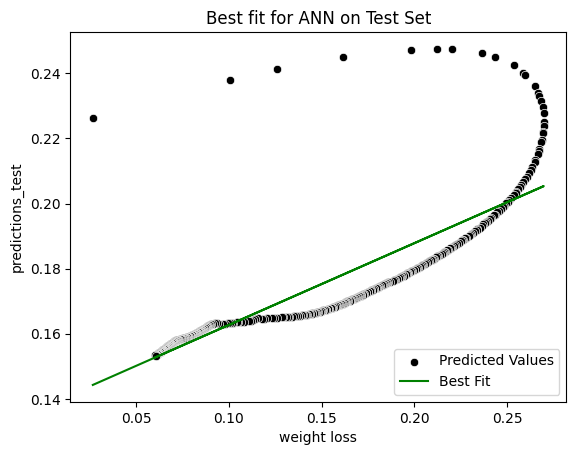

In [51]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='weight loss', y='predictions_test', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTCLF = DecisionTreeRegressor()

In [ ]:
DTCLF.fit(X,y)

DecisionTreeRegressor()

For Validation Set

In [22]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']

In [23]:
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

NameError: ignored

In [ ]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.1697118129301248e-07
RMSE 0.00046580165445499704
MAE 0.00012030057442983016
R2_Score 0.999953613351239


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df

,time,tem,heating rate
0,0.000088,0.164170,0.985023
1,0.000304,0.300491,0.948919
2,0.000624,0.419084,0.898037
3,0.001017,0.517728,0.839559
4,0.001207,0.555353,0.812712
...,...,...,...
400,0.068728,0.995672,0.014909
401,0.068810,0.995676,0.014857
402,0.068883,0.995677,0.014817
403,0.068936,0.995681,0.014780


In [ ]:
prediction = pd.DataFrame(predictions_val)

In [ ]:
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [ ]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)

In [ ]:
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.047584,0.052711
1,0.000304,0.300491,0.948919,0.091689,0.096213
2,0.000624,0.419084,0.898037,0.137560,0.133786


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


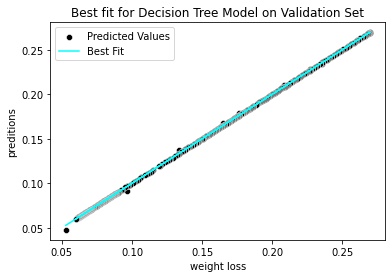

In [ ]:
x = final_df['weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='cyan', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Validation Set')
plt.legend()

For Test Set

In [39]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']

In [ ]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.031970
1,0.105146
2,0.122015
3,0.158362
4,0.200527
...,...
401,0.060775
402,0.060664
403,0.060570
404,0.060422


In [ ]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.191697729215043e-07
RMSE 0.0004681557143958667
MAE 0.00012087848383790166
R2_Score 0.9999532292614934


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000022,0.083016,0.996191
1,0.000335,0.314620,0.943859
2,0.000546,0.394437,0.910238
3,0.000970,0.507735,0.846225
4,0.001658,0.627462,0.752954
...,...,...,...
401,0.068721,0.995672,0.014913
402,0.068776,0.995674,0.014879
403,0.068849,0.995677,0.014835
404,0.068927,0.995680,0.014787


In [ ]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.031970,0.026688
1,0.000335,0.314620,0.943859,0.105146,0.100723
2,0.000546,0.394437,0.910238,0.122015,0.126040
3,0.000970,0.507735,0.846225,0.158362,0.161575
4,0.001658,0.627462,0.752954,0.200527,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.060775,0.060765
402,0.068776,0.995674,0.014879,0.060664,0.060677
403,0.068849,0.995677,0.014835,0.060570,0.060561
404,0.068927,0.995680,0.014787,0.060422,0.060434


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


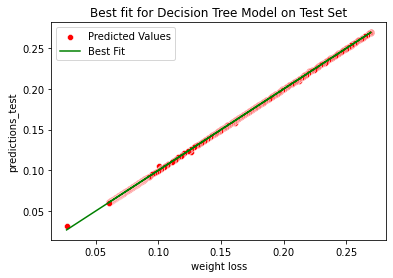

In [ ]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for Decision Tree Model on Test Set')
plt.legend()

Random Forest For Validation Set

In [ ]:
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
rfc = RandomForestRegressor()

In [ ]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']

In [ ]:
rfc.fit(X,y)

RandomForestRegressor()

In [ ]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']
predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 3.875744370842183e-08
RMSE 0.00019686910298069078
MAE 3.9986732847362405e-05
R2_Score 0.999991713978246


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.051916,0.052711
1,0.000304,0.300491,0.948919,0.092778,0.096213
2,0.000624,0.419084,0.898037,0.133865,0.133786


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


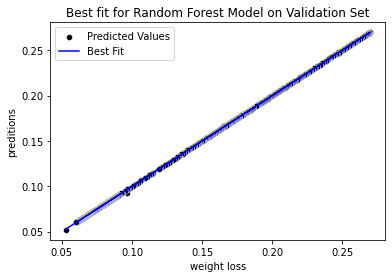

In [ ]:
x = final_df['weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'black', label = 'Predicted Values')
plt.plot(x, a*x+b, color='Blue', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Validation Set')
plt.legend()

Random Forest For Test Set

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']
predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.024710
1,0.102663
2,0.124883
3,0.159095
4,0.198665
...,...
401,0.060770
402,0.060671
403,0.060556
404,0.060434


In [ ]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 4.296343086311408e-08
RMSE 0.00020727621875920565
MAE 4.650605038427325e-05
R2_Score 0.9999908316216992


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.024710,0.026688
1,0.000335,0.314620,0.943859,0.102663,0.100723
2,0.000546,0.394437,0.910238,0.124883,0.126040
3,0.000970,0.507735,0.846225,0.159095,0.161575
4,0.001658,0.627462,0.752954,0.198665,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.060770,0.060765
402,0.068776,0.995674,0.014879,0.060671,0.060677
403,0.068849,0.995677,0.014835,0.060556,0.060561
404,0.068927,0.995680,0.014787,0.060434,0.060434


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


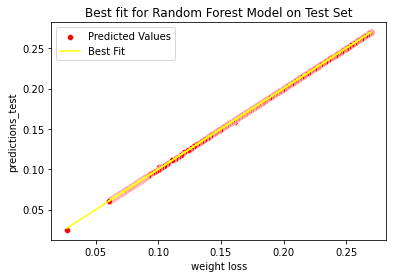

In [ ]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'Red', label = 'Predicted Values')
plt.plot(x, a*x+b, color='yellow', label = 'Best Fit') 
plt.title('Best fit for Random Forest Model on Test Set')
plt.legend()

SVM for Validation Set

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()

In [ ]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['weight loss']
Root = df_training['Root']
svr.fit(X,y)

SVR()

In [ ]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['weight loss']
Root_val = df_val['Root']
predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 0.004725533513874425
RMSE 0.06874251605720018
MAE 0.05997195727913627
R2_Score -0.010280084249488342


In [ ]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,weight loss
0,0.000088,0.164170,0.985023,0.109592,0.052711
1,0.000304,0.300491,0.948919,0.116920,0.096213
2,0.000624,0.419084,0.898037,0.125603,0.133786


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


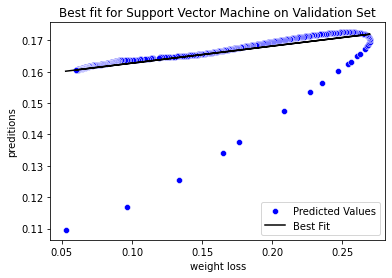

In [ ]:
x = final_df['weight loss']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'blue', label = 'Predicted Values')
plt.plot(x, a*x+b, color='black', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Validation Set')
plt.legend()

SVM for Test Set

In [ ]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['weight loss']
Root_test = df_test['Root']
predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.106730
1,0.117850
2,0.123644
3,0.133200
4,0.144368
...,...
401,0.160594
402,0.160582
403,0.160566
404,0.160549


In [ ]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 0.004723726575406931
RMSE 0.06872937199921829
MAE 0.05995299867920979
R2_Score -0.00804128913227209


In [ ]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,weight loss
0,0.000022,0.083016,0.996191,0.106730,0.026688
1,0.000335,0.314620,0.943859,0.117850,0.100723
2,0.000546,0.394437,0.910238,0.123644,0.126040
3,0.000970,0.507735,0.846225,0.133200,0.161575
4,0.001658,0.627462,0.752954,0.144368,0.198368
...,...,...,...,...,...
401,0.068721,0.995672,0.014913,0.160594,0.060765
402,0.068776,0.995674,0.014879,0.160582,0.060677
403,0.068849,0.995677,0.014835,0.160566,0.060561
404,0.068927,0.995680,0.014787,0.160549,0.060434


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


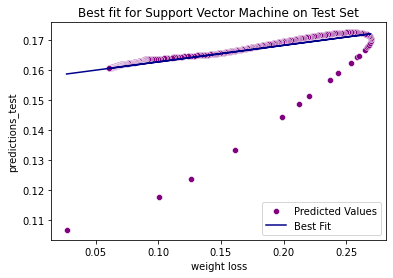

In [ ]:
x = final_df_test['weight loss']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(x, y ,color = 'purple', label = 'Predicted Values')
plt.plot(x, a*x+b, color='darkblue', label = 'Best Fit') 
plt.title('Best fit for Support Vector Machine on Test Set')
plt.legend()